       ts_code trade_date     open     high      low    close  pre_close  \
0    600519.SH   20211217  2100.50  2108.00  2036.00  2050.70    2118.99   
1    600519.SH   20211216  2115.00  2144.05  2086.23  2118.99    2135.00   
2    600519.SH   20211215  2142.15  2164.95  2125.02  2135.00    2150.00   
3    600519.SH   20211214  2118.20  2167.90  2100.00  2150.00    2118.20   
4    600519.SH   20211213  2154.00  2180.00  2118.00  2118.20    2090.00   
..         ...        ...      ...      ...      ...      ...        ...   
471  600519.SH   20200108  1085.05  1095.50  1082.58  1088.14    1094.53   
472  600519.SH   20200107  1077.50  1099.00  1076.40  1094.53    1077.99   
473  600519.SH   20200106  1070.86  1092.90  1067.30  1077.99    1078.56   
474  600519.SH   20200103  1117.00  1117.00  1076.90  1078.56    1130.00   
475  600519.SH   20200102  1128.00  1145.06  1116.00  1130.00    1183.00   

     change  pct_chg        vol        amount  
0    -68.29  -3.2228   48403.18  9.9888

<AxesSubplot:title={'center':'Moving average(MA) lines of 600519.SH'}, xlabel='date', ylabel='price'>

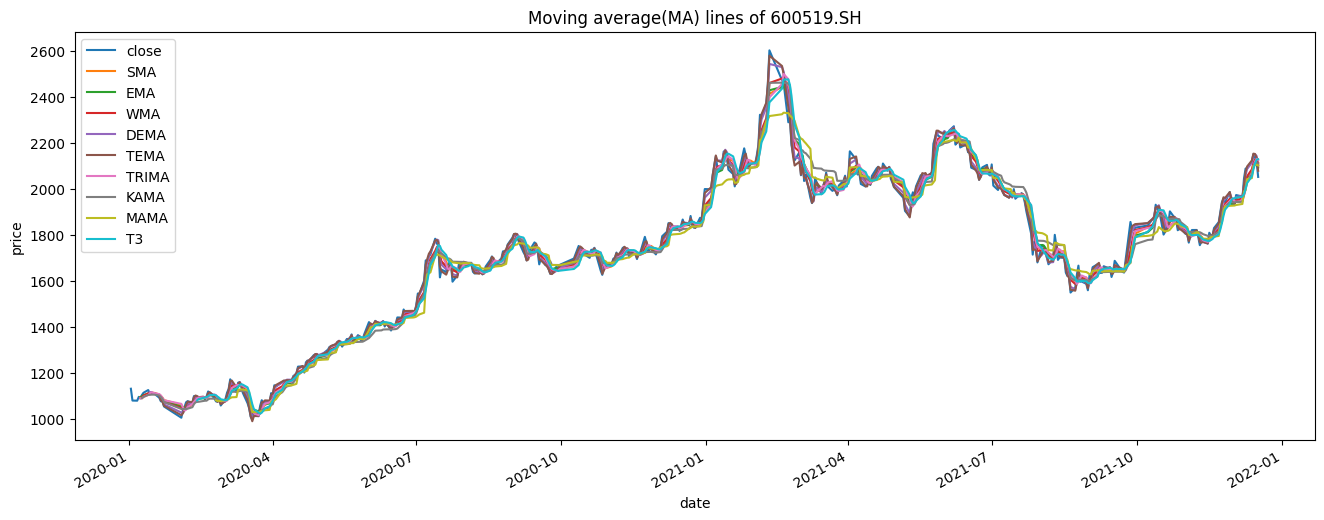

In [3]:

# 导入tushare
import tushare as ts
import pandas as pd
# 初始化pro接口
pro = ts.pro_api('689259e8ee07ec1568ab9066ba5e76bb4a686bda3f12e8e74f006c0c')

# 拉取数据
df = pro.query('daily', ts_code='600519.SH', start_date='20200101', end_date='20211217')

print(df)
df.index=pd.to_datetime(df['trade_date'])
df=df.sort_index()


import talib as ta

# 调用TA-lib并计算MA
types=['SMA','EMA','WMA','DEMA','TEMA','TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)

df_ma.plot(figsize=(16,6),title='Moving average(MA) lines of 600519.SH',
           xlabel='date', ylabel='price')

